<a href="https://colab.research.google.com/github/NAMRATA-MISHRA/Projects/blob/main/PerformanceOfK_Fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline

# load dataset
dataset = pd.read_csv('tpmd.csv')
dataset

,T,RH,LW,WS,GR,DayPrediction
0,32.3,47.0,24,3,51,0
1,31.6,45.0,23,2,49,0
2,30.4,43.0,21,4,46,0
3,31.7,46.0,24,3,50,0
4,32.5,50.0,27,1,53,0
...,...,...,...,...,...,...
238,18.5,60.0,31,4,28,0
239,19.6,61.0,30,3,26,0
240,20.4,64.0,27,2,25,0
241,21.1,67.0,29,1,27,0


In [ ]:
X = dataset.iloc[:, 0:-1].values
y = dataset. iloc [:, -1].values
print("Matrix of features", X, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')

Matrix of features
[[32.3 47.  24.   3.  51. ]
 [31.6 45.  23.   2.  49. ]
 [30.4 43.  21.   4.  46. ]
 ...
 [20.4 64.  27.   2.  25. ]
 [21.1 67.  29.   1.  27. ]
 [20.  65.  26.   2.  26. ]]
--------------------------------------------------
Target Variable
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable", encoded_y, sep="\n")

Mapping of Label Encoded Classes
{0: 0, 1: 1}
Label Encoded Target Variable
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }
          

In [ ]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):       
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)
decision_tree_result = cross_validation(decision_tree_model, X, encoded_y, 5)
print(decision_tree_result)


{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.93877551, 0.93877551, 0.89795918, 0.91666667, 0.9375    ]), 'Mean Validation Accuracy': 92.593537414966, 'Validation Precision scores': array([0.75      , 0.8       , 0.66666667, 0.6       , 1.        ]), 'Mean Validation Precision': 0.7633333333333334, 'Validation Recall scores': array([0.6       , 0.66666667, 0.33333333, 0.6       , 0.4       ]), 'Mean Validation Recall': 0.5199999999999999, 'Validation F1 scores': array([0.66666667, 0.72727273, 0.44444444, 0.6       , 0.57142857]), 'Mean Validation F1 Score': 0.6019624819624819}


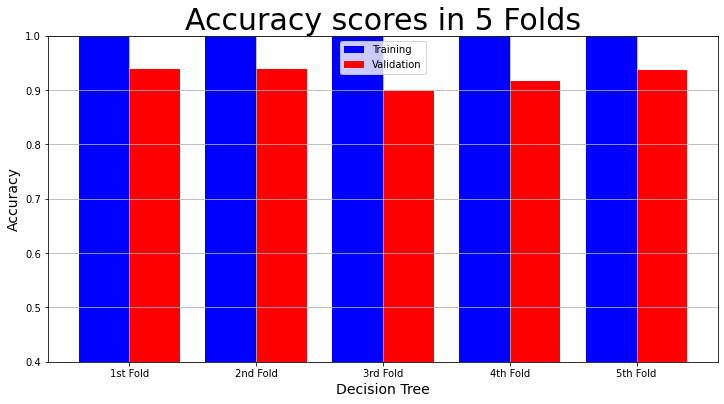

In [ ]:
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

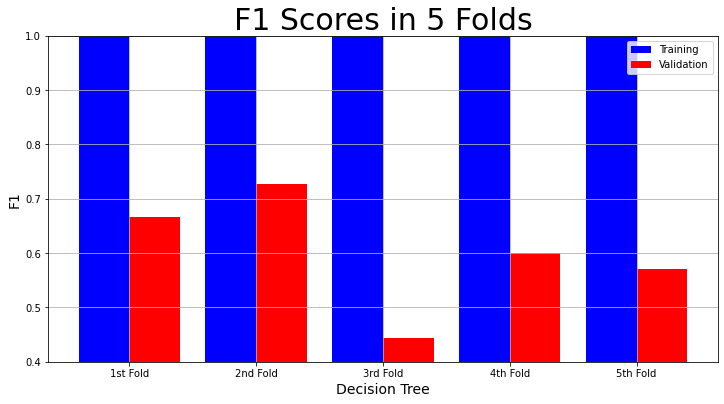

In [ ]:
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            decision_tree_result["Training F1 scores"],
            decision_tree_result["Validation F1 scores"])

{'Training Accuracy scores': array([0.98969072, 0.98969072, 0.98969072, 1.        , 0.98461538]), 'Mean Training Accuracy': 99.07375099127677, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([0.90909091, 0.9047619 , 0.9047619 , 1.        , 0.86363636]), 'Mean Training Recall': 0.9164502164502164, 'Training F1 scores': array([0.95238095, 0.95      , 0.95      , 1.        , 0.92682927]), 'Mean Training F1 Score': 0.955842044134727, 'Validation Accuracy scores': array([0.93877551, 0.91836735, 0.91836735, 0.91666667, 0.91666667]), 'Mean Validation Accuracy': 92.17687074829932, 'Validation Precision scores': array([0.75, 1.  , 1.  , 0.6 , 1.  ]), 'Mean Validation Precision': 0.8699999999999999, 'Validation Recall scores': array([0.6       , 0.33333333, 0.33333333, 0.6       , 0.2       ]), 'Mean Validation Recall': 0.4133333333333334, 'Validation F1 scores': array([0.66666667, 0.5       , 0.5       , 0.6       , 0.333

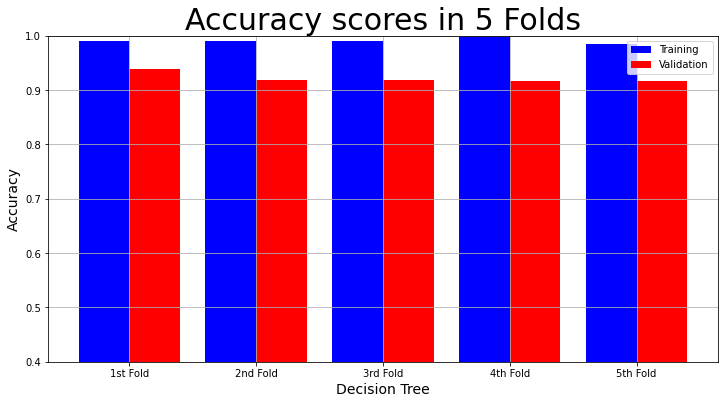

In [ ]:
decision_tree_model_2 = DecisionTreeClassifier(criterion="entropy",
                                               min_samples_split=5,
                                               random_state=0)
decision_tree_result_2 = cross_validation(decision_tree_model_2, X, encoded_y, 5)
print(decision_tree_result_2)

plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result_2["Training Accuracy scores"],
            decision_tree_result_2["Validation Accuracy scores"])

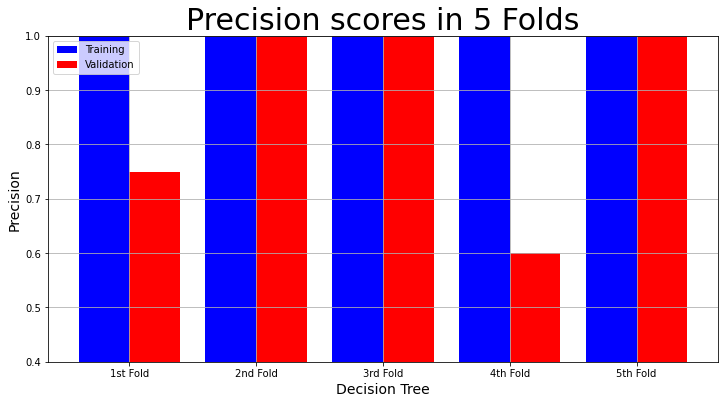

In [ ]:
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result_2["Training Precision scores"],
            decision_tree_result_2["Validation Precision scores"])